# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS





# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3}
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORTING DATA

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# STEP #2: EXPLORING THE DATASET  

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Let's view the head of the training dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Let's view the last elements in the training dataset
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


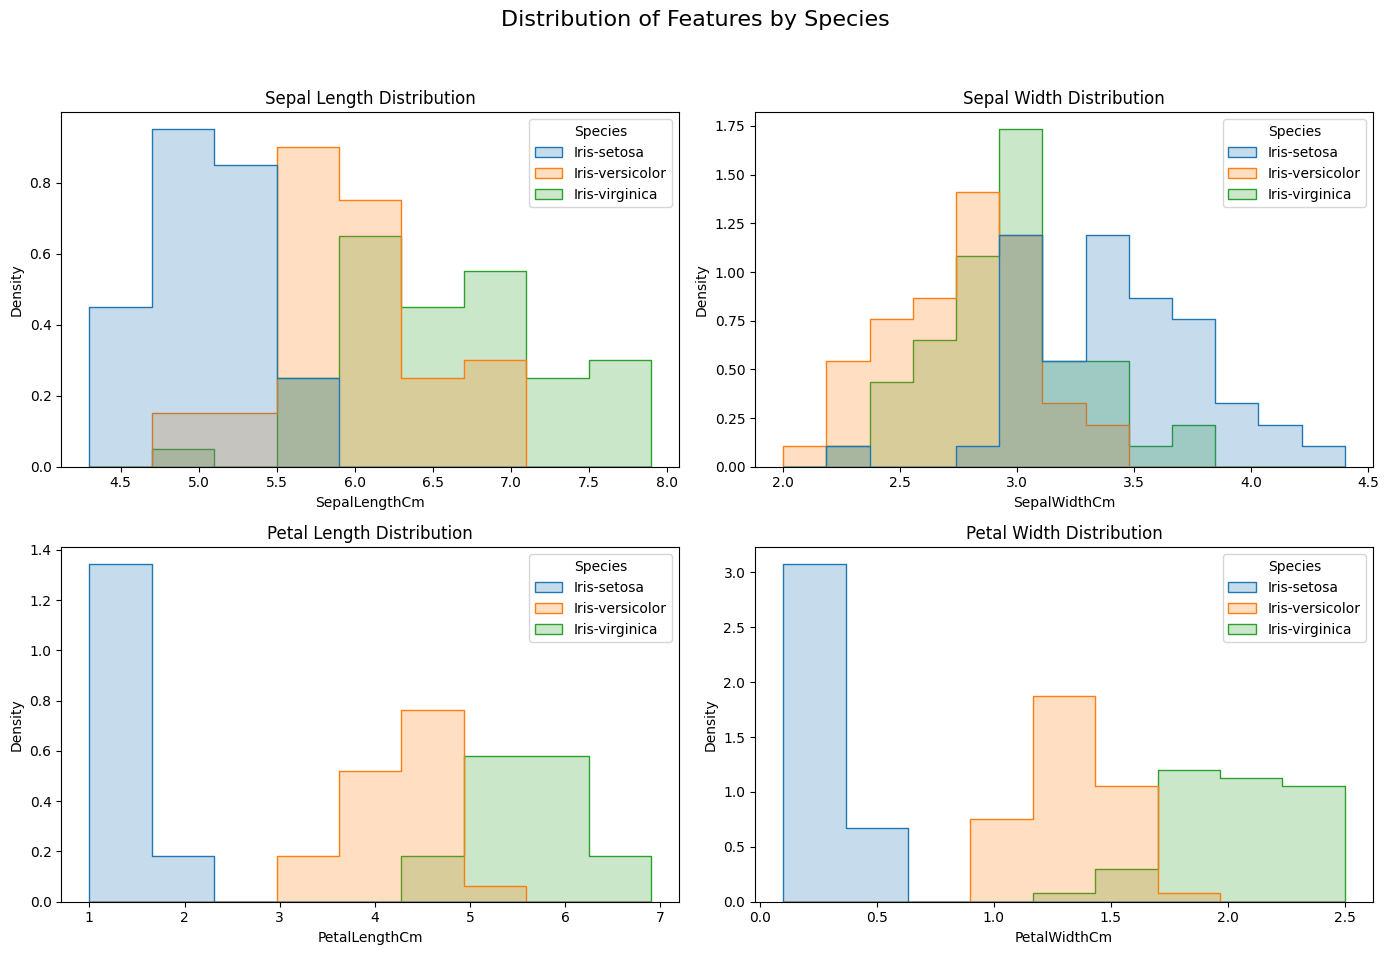

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Features by Species', fontsize=16)

# Plot distribution for each feature by species
sns.histplot(df, x="SepalLengthCm", hue="Species", element="step", stat="density", common_norm=False, ax=axes[0, 0])
axes[0, 0].set_title("Sepal Length Distribution")

sns.histplot(df, x="SepalWidthCm", hue="Species", element="step", stat="density", common_norm=False, ax=axes[0, 1])
axes[0, 1].set_title("Sepal Width Distribution")

sns.histplot(df, x="PetalLengthCm", hue="Species", element="step", stat="density", common_norm=False, ax=axes[1, 0])
axes[1, 0].set_title("Petal Length Distribution")

sns.histplot(df, x="PetalWidthCm", hue="Species", element="step", stat="density", common_norm=False, ax=axes[1, 1])
axes[1, 1].set_title("Petal Width Distribution")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


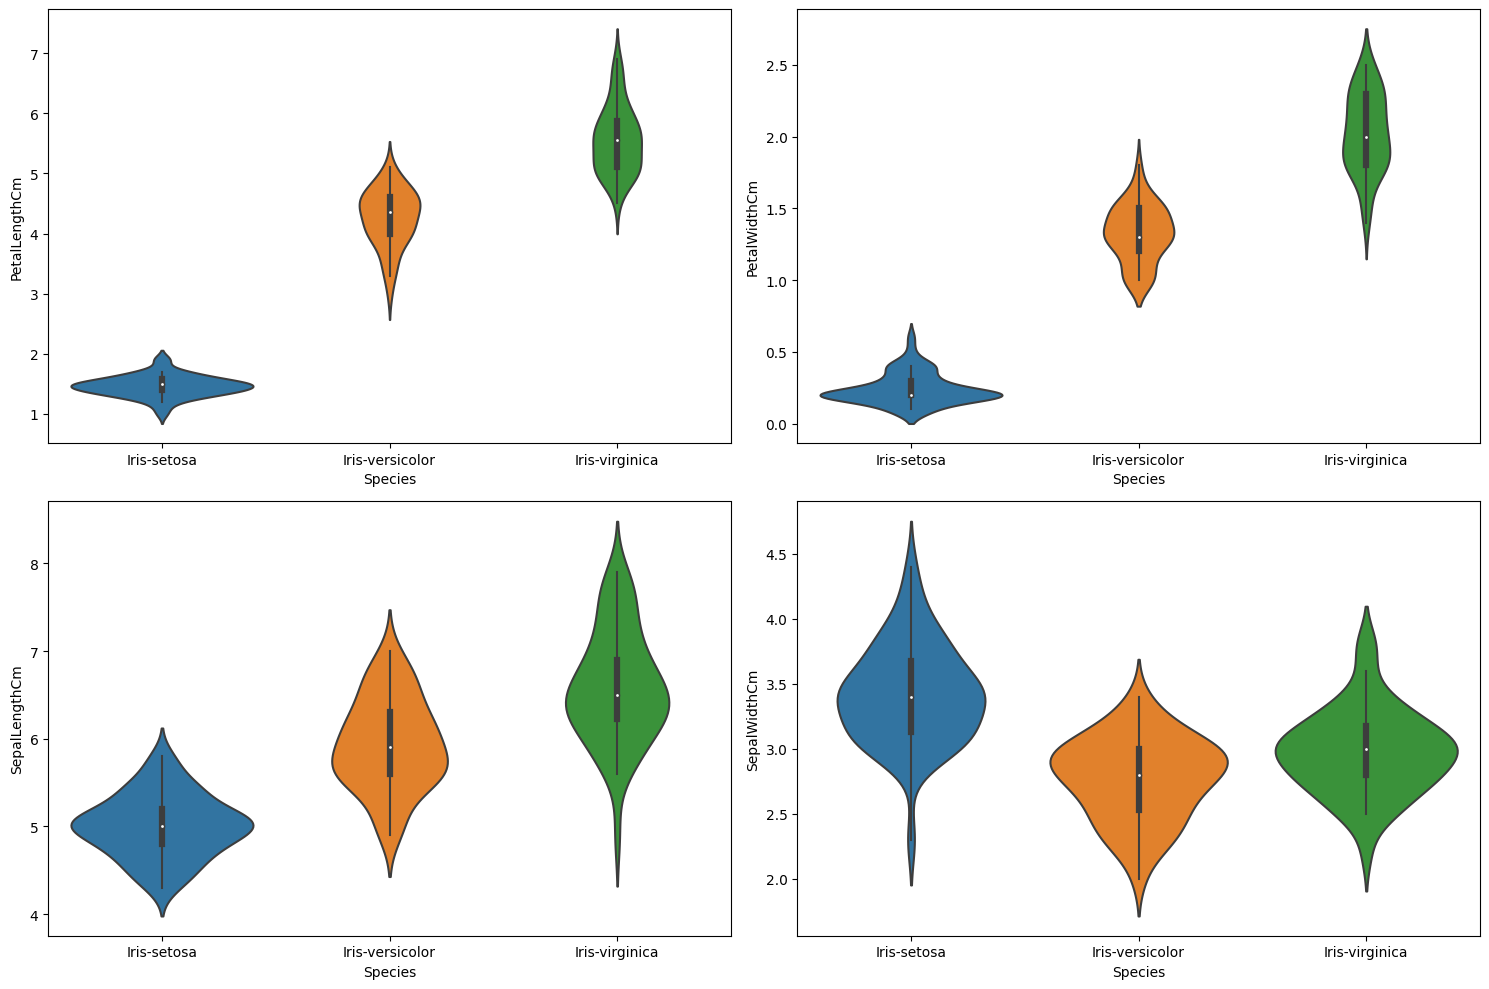

In [9]:
# Let's show the Violin plot

# Set the size of the entire figure
plt.figure(figsize=(15, 10))

# Plot for Petal Length
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
sns.violinplot(x="Species", y="PetalLengthCm", data=df)

# Plot for Petal Width
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
sns.violinplot(x="Species", y="PetalWidthCm", data=df)

# Plot for Sepal Length
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
sns.violinplot(x="Species", y="SepalLengthCm", data=df)

# Plot for Sepal Width
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
sns.violinplot(x="Species", y="SepalWidthCm", data=df)

# Show the plots
plt.tight_layout()
plt.show()


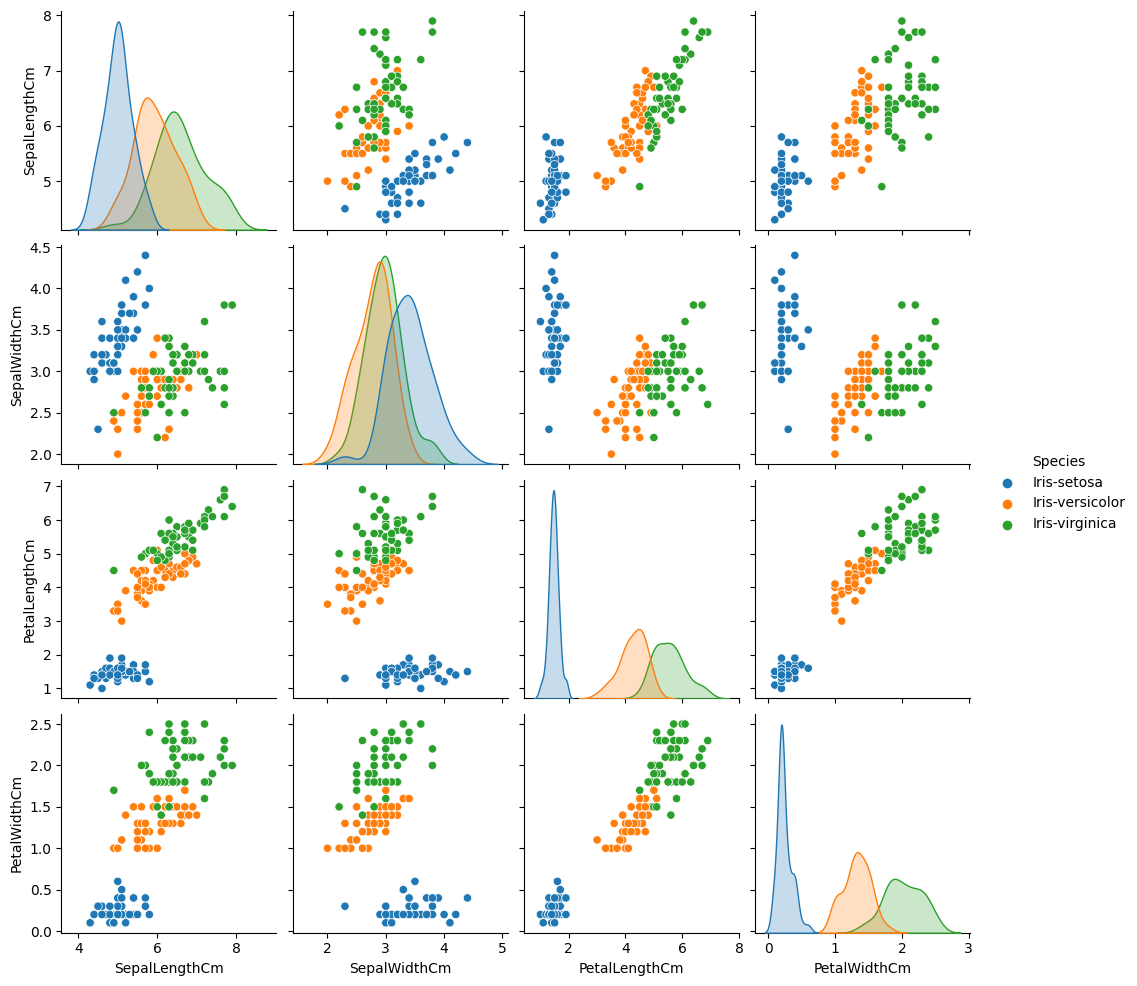

In [10]:
# Let's try the Seaborn pairplot
import seaborn as sns
import matplotlib.pyplot as plt


# Create the pair plot
sns.pairplot(df, hue="Species", diag_kind="kde", height=2.5)

# Display the plot
plt.show()


<ipython-input-11-ea4d384f8491>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


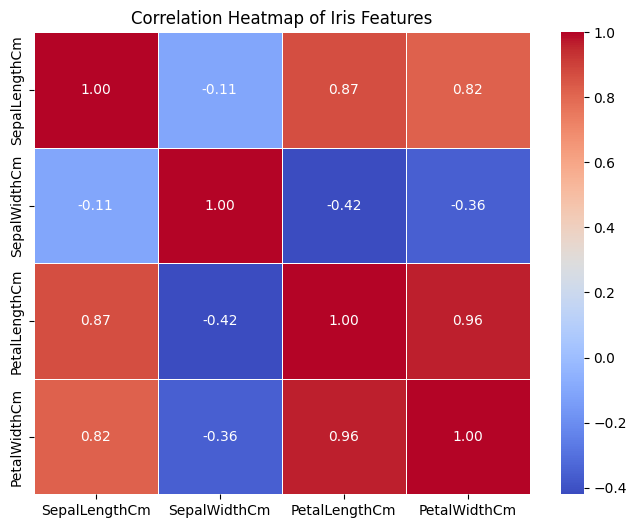

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd


# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()


# STEP #3: DATA CLEANING

In [12]:
# Let's drop the ID and Species (target label) coloumns
df_01 = df.drop(columns=[ 'Species'])
df_01

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df_label = df[['Species']]
df_label

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [14]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X = df_01
y = df_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.64, random_state=101)

In [15]:
y_train.shape

(54, 1)

In [16]:
X_test.shape

(96, 4)

In [17]:
X_train.shape

(54, 4)

# STEP #4: TRAINING THE MODEL

In [18]:
# Fitting K-NN to the Training set

from sklearn.neighbors import KNeighborsClassifier

iris_knn_classifier = KNeighborsClassifier(n_neighbors=5)

iris_knn_classifier.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# STEP #5: EVALUATING THE MODEL



In [19]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = iris_knn_classifier.predict(X_test)
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.89      0.97      0.93        33
 Iris-virginica       0.96      0.86      0.91        28

       accuracy                           0.95        96
      macro avg       0.95      0.94      0.94        96
   weighted avg       0.95      0.95      0.95        96



# STEP #5: SAVE THE MODEL  

1.   List item
2.   List item



In [20]:
import pickle
pickle_out = open("iris_knn_classifier2.pkl", mode = "wb")
pickle.dump(iris_knn_classifier, pickle_out)
pickle_out.close()

In [24]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1


In [21]:
pip freeze > requirements.txt


In [22]:
pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.9 MB/s eta 0:00:00
Processing /colabtools/dist/google-colab-1.0.0.tar.gz (from -r requirements.txt (line 139))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/colabtools/dist/google-colab-1.0.0.tar.gz'



In [2]:
pip freeze > requirements1.txt


Note: you may need to restart the kernel to use updated packages.
